## Classifying movie reviews on the IMDB dataset

In [8]:
from keras.datasets import imdb

In [9]:
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)

In [10]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
train_labels[1]

0

In [12]:
train_data.shape[0]

25000

In [13]:
train_data.shape

(25000,)

In [14]:
word_index=imdb.get_word_index()

In [15]:
reverse_word_index=dict([(value,key) for (key, value) in word_index.items()])

In [16]:
decoded_review=''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [17]:
decoded_review

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

In [18]:
train_labels.shape

(25000,)

In [19]:
import numpy as np

In [20]:
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results


In [21]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [22]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [23]:
x_train.shape

(25000, 10000)

In [24]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [47]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [48]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [51]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.5098 - acc: 0.7971 - val_loss: 0.3756 - val_acc: 0.8721
Epoch 2/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.2983 - acc: 0.9029 - val_loss: 0.3103 - val_acc: 0.8780
Epoch 3/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.2193 - acc: 0.9284 - val_loss: 0.3042 - val_acc: 0.8774
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1743 - acc: 0.9426 - val_loss: 0.2748 - val_acc: 0.8910
Epoch 5/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1420 - acc: 0.9547 - val_loss: 0.2835 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1166 - acc: 0.9637 - val_loss: 0.2942 - val_acc: 0.8874
Epoch 7/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.0973 - acc: 0.9707 - val_loss: 0.3141 - 

In [52]:
history_dict=history.history

In [53]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [54]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

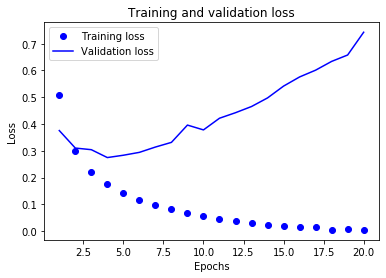

In [55]:
epochs=range(1,21)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [57]:
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']

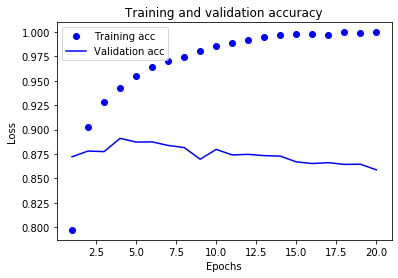

In [59]:
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.4697 - acc: 0.8214
Epoch 2/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2711 - acc: 0.9078
Epoch 3/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.2087 - acc: 0.9271
Epoch 4/4
25000/25000 [==============================] - 1s 53us/step


In [61]:
results

[0.287000131483078, 0.88628]

In [62]:
model.predict(x_test)

array([[0.23437521],
       [0.9998512 ],
       [0.86101687],
       ...,
       [0.10392118],
       [0.07070863],
       [0.6108509 ]], dtype=float32)